# Sales Analysis 

# Introduction

In this notebook, I'll clean and analyze an online electronics store sales data to determine the optimal time/place to further promote their products through online ads, and most sold products, among other questions.

1. What was the best month for sale? How much was earned that month?

2. What city has the highest number of sales? 

3. What time should we display advertisements to maximize the likelihood of customers buying products?

4. What products are most often sold together?

5. What product sold the most? Why do you think it sold the most?


### Import the necessary Libraries

In [22]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
from itertools import combinations 
from collections import Counter


### Task 1: Merging 12 months of Sales data single file

In [23]:
# Upload a file by name
pd.read_csv('./Sales_Data/Sales_April_2019.csv') 


# Upload all files ended with .csv
files = [file for file in os.listdir('./Sales_Data/') if file.endswith('.csv')]

# Define an empty Dataframe to store all our data. 
all_months_data = pd.DataFrame()

# Concatenate data of all months 
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

# Create a CSV with all the monthly data
all_months_data.to_csv('all_data.csv', index = False)

### Read in the updated data frame.

In [24]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Find the rows with 'Quantity Ordered' and delete them.

In [25]:
all_data = all_data[all_data['Quantity Ordered'] != 'Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Convert the 'Order Date' column to the DateTime format. 

In [26]:
# errors='coerce' : invalid parsing will be set as NaT
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce') 

### Task 2: Add month column.

In [27]:
all_data['month'] = all_data['Order Date'].dt.month
# all_data['month_full'] = all_data['Order Date'].dt.month_name().str[:3]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0


### Convert columns to the right type: 'Quantity Ordered' to float and 'Price Each' to integers. 

In [28]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data .dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
month                      float64
dtype: object

### Task 3: Add sales column

In [29]:
all_data['Sale'] = all_data['Quantity Ordered'] * all_data['Price Each'] 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95


### Task 4: Add a City column

In [30]:
all_data['City'] = (all_data['Purchase Address'].str.split(n = 1, pat= ',').str[1]).str.rsplit(n = 1, pat= ' ').str[0]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,"Atlanta, GA"


## 1. What was the best month for sale? How much was earned that month?

            

In [31]:
df_salesMonth = all_data.groupby(all_data.month).sum()
df_salesMonth['months'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
df_salesMonth

,Quantity Ordered,Price Each,Sale,months
month,,,,
1.0,10903.0,1811768.38,1822256.73,Jan
2.0,13449.0,2188884.72,2202022.42,Feb
3.0,17005.0,2791207.83,2807100.38,Mar
4.0,20558.0,3367671.02,3390670.24,Apr
5.0,18667.0,3135125.13,3152606.75,May
6.0,15253.0,2562025.61,2577802.26,Jun
7.0,16072.0,2632539.56,2647775.76,Jul
8.0,13448.0,2230345.42,2244467.88,Aug
9.0,13109.0,2084992.09,2097560.13,Sep


Text(0, 0.5, 'Month')

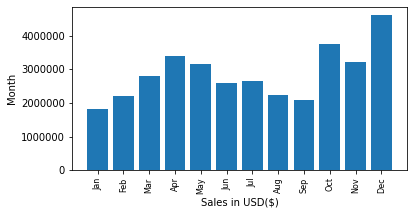

In [32]:
plt.figure(figsize=(6,3))
plt.bar(df_salesMonth['months'], df_salesMonth['Sale'])
plt.xticks(rotation = 'vertical', size = 8)
plt.xlabel('Sales in USD($)')
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('Month')

#### The month with more sales: December. Highly likable that sales rise due to the holidays. 

## 2. What city has the highest number of sales? 

In [33]:
df_citySales = all_data.groupby(all_data.City).sum()
df_citySales

,Quantity Ordered,Price Each,month,Sale
City,,,,
"Atlanta, GA",16602.0,2779908.20,104794.0,2795498.58
"Austin, TX",11153.0,1809873.61,69829.0,1819581.75
"Boston, MA",22528.0,3637409.77,141112.0,3661642.01
"Dallas, TX",16730.0,2752627.82,104620.0,2767975.40
"Los Angeles, CA",33289.0,5421435.23,208325.0,5452570.80
"New York City, NY",27932.0,4635370.83,175741.0,4664317.43
"Portland, ME",2750.0,447189.25,17144.0,449758.27
"Portland, OR",11303.0,1860558.22,70621.0,1870732.34
"San Francisco, CA",50239.0,8211461.74,315520.0,8262203.91


Text(0.5, 0, 'City Name')

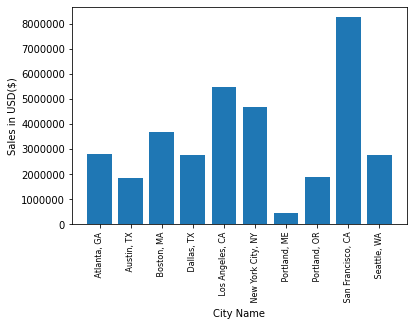

In [34]:
cities = list(df_citySales.index)
plt.bar(cities, df_citySales['Sale'])
plt.xticks(rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD($)')
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('City Name')

#### San Francisco, CA is the city with the most sales, probably because large technology companies are located in CA.

## 3. What time should we display advertisements to maximize the likelihood of customers buying products?

In [35]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale,City,Hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,"New York City, NY",0.0
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,"New York City, NY",7.0
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,"New York City, NY",18.0
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,"San Francisco, CA",15.0
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,"Atlanta, GA",12.0


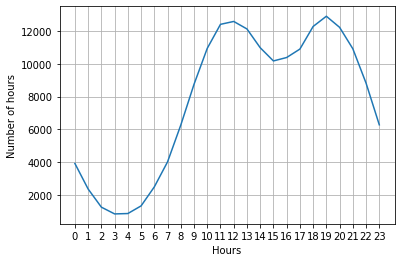

In [36]:
hours_sale = all_data.groupby(['Hour']).count().reset_index()
plt.plot(hours_sale['Hour'], hours_sale['Quantity Ordered'])
plt.xticks(hours_sale['Hour'])
plt.xlabel('Hours')
plt.ylabel('Number of hours')
plt.grid()
plt.show()
# My recommendation is around 11am (11) or 7 pm (19)

#### Based on the graph, we can conclude that just before 11 am - 12 am and from 6 pm - 7 pm it's a good time to advertise. Those are the hours when the pick-in order happens. 

## 4. What products are most often sold together?

In [37]:
df2 = all_data[all_data['Order ID'].duplicated(keep=False)]
df2['Grouped Products'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df2[['Order ID','Grouped Products']].drop_duplicates()

/var/folders/pl/clj7x4m153j6y749_p0tpx4m0000gn/T/ipykernel_70892/4239735433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped Products'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [38]:
counter = Counter()

for shop in df2['Grouped Products']:
    if isinstance(shop, str):
        shop_list = shop.split(',')
        counter.update(Counter(combinations(shop_list, 2)))
        
for key, value in counter.most_common(10):
    print (key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### The products most often sold together are iPhone and Lightning Charging Cable. 

## 5. What product sold the most? Why do you think it sold the most?

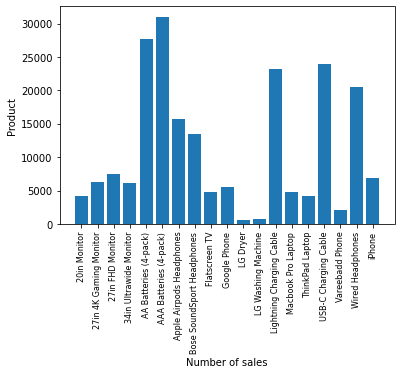

In [39]:
prod_sold = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
prod_sold.sort_values(by = ['Product'], inplace=True)

plt.bar(prod_sold['Product'], prod_sold['Quantity Ordered'])
plt.xticks(prod_sold['Product'])
plt.xticks(rotation = 'vertical', size = 8)
plt.xlabel('Number of sales')
plt.ylabel('Product')
plt.show()

#### AAA Batteries (4-pack) are the product that sold the most. My supposition is that price has a direct impact. I'll try to demonstrate it by presenting the product's price. 

/var/folders/pl/clj7x4m153j6y749_p0tpx4m0000gn/T/ipykernel_70892/2151226002.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prod_sold['Product'], rotation = 'vertical', size = 8)


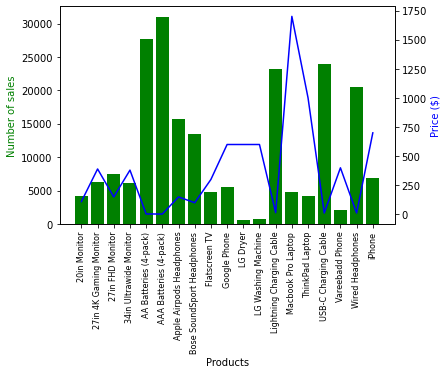

In [40]:
prod_price = all_data[['Product', 'Price Each']].drop_duplicates()
prod_price.dropna(inplace=True)
prod_price.sort_values(by = ['Product'], inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prod_sold['Product'], prod_sold['Quantity Ordered'], color='g')
ax2.plot(prod_sold['Product'], prod_price['Price Each'], color='b')

ax1.set_xticklabels(prod_sold['Product'], rotation = 'vertical', size = 8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Number of sales', color='g')
ax2.set_ylabel('Price ($)', color='b')

plt.show()
